# Comparing 'Forward' vs 'Reverse' Plate Reads

In [1]:
# Import standard dependencies.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob

# Custom written modules.
import mwc_induction_utils as mwc

# Set the plotting environments.
%matplotlib notebook
mwc.set_plotting_style()

/Users/gchure/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Reading of the experimental samples through flow cytometry was performed in an autoated fashion. This means that we were able to simply place the correctly assembled 96-well plate on a pedestal while the MACSQuant flow cytometer did the heavy lifting. The cytometer read all samples from a single IPTG concentration within the same 10 minute block. This means that the samples of the highest IPTG concentration were read approximately 2 - 3 hours after the lowest IPTG samples were read. To ensure that this time difference was not influencing our results, we ran a subset of samples in the 'reverse' orientation in which the samples of lowest induction were read last. Here, we show how neither the autfluorescence or the constitutive expression samples changed with time. 

To begin, we will load in all auto and delta data sets for RBS1027 O2, both forward and reverse.

In [2]:
# Load in all O2 files within the data folder.
data_sets = glob.glob('../../data/2016*O2_*titration*')
with open('../../data/datasets_ignore.csv') as f:
    ignored_sets = f.readlines()
    ignored_sets = ['../../data/' + z.rstrip() for z in ignored_sets]
with open('../../data/reversed_plates_O2.csv') as f:
    control_sets =  f.readlines()
    control_sets = ['../../data/' + z.rstrip() for z in control_sets]
forward_sets, reversed_sets  = [], []
for entry in data_sets:
    if entry not in ignored_sets:
        samp = pd.read_csv(entry, comment='#')
        if 'r2' in entry:
            samp.insert(1, 'exp_run', 2)
        else: 
            samp.insert(1, 'exp_run', 1)
                
        if entry in control_sets: 
            reversed_sets.append(samp)
        else:
            forward_sets.append(samp)
            
# Add columns.
fwd = pd.concat(forward_sets, axis=0)
rev = pd.concat(reversed_sets, axis=0)
fwd.insert(np.shape(fwd)[1], 'reversed', 0)
rev.insert(np.shape(rev)[1], 'reversed', 1)

# Make the final data frame.
df = pd.concat([fwd, rev], axis=0)
df = df[df['rbs'] == 'RBS1027']
                                  

Now we can group the data frame as needed. and generate the plot of fold change. 

<IPython.core.display.Javascript object>


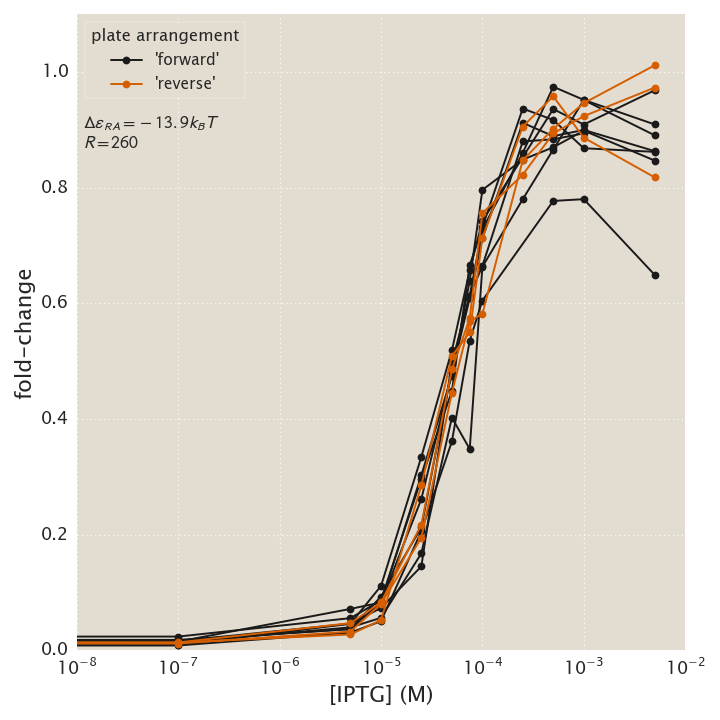

In [3]:
# Group the data frame by the important bits.
grouped = pd.groupby(df, ['reversed', 'date', 'exp_run', 'rbs'])

# Plot the fold change as a function of IPTG coloring the reverse runs.
plt.figure(figsize=(9,9))
for group, data in grouped:
    if group[0] == 0:
        fwd, = plt.plot(data['IPTG_uM']/1E6, data['fold_change_A'], 'k-o',
                 label="'forward'", alpha=1)
    else:
        rev, = plt.plot(data['IPTG_uM']/1E6, data['fold_change_A'], 'r-o',
                 label="'reverse'", alpha=1)

# Do some formatting.
legend = plt.legend(handles=[fwd, rev], loc='upper left', fontsize=14,
                    title='plate arrangement')
plt.setp(legend.get_title(),fontsize=15)
plt.xlabel('[IPTG] (M)', fontsize=20)
plt.ylabel('fold-change', fontsize=20)
plt.setp(legend.get_title(),fontsize=15)
plt.tick_params(labelsize=16)
plt.xscale('log')
plt.ylim([0, 1.1])
plt.tight_layout()
plt.xlim([1E-8, 1E-2])
ax = plt.gca()

# Add a descriptive label.
plt.text(0.01, 0.82, '$\Delta\epsilon_{RA} = -13.9 k_BT$', fontsize=16,
        transform=ax.transAxes)
plt.text(0.01, 0.79, '$R = 260$', fontsize=16,
        transform=ax.transAxes)

By eye, it appears that there is no difference in calculated fold change when the plate is run in the 'reversed' orientation. 